# Data Science Salaries Analysis
This report will dive into a dataset from [Kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023?resource=download) regarding salaries in the data science field. This data set includes columns ranging from experience levels to comapany sizes. I will be conducting analysis answering questions about the trends and correlations within the data using tools such as Pandas, NumPy, Matplotlib and Seaborn.

## Importing and Preparing Dataset
I will start by loading in the dataset and explore the dataset's parameters using Pandas.
After I will clean the data using Pandas and Numpy.

In [3]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('ds_salaries.csv')
raw_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


I can see that there are abbreviations that should be changed with Pandas.

In [4]:
#check to see how many distinct values there are
for column in raw_df.columns:
    num_distinct_values = len(raw_df[column].unique())
    print('{} | {} distinct values'.format(column, num_distinct_values))

work_year | 4 distinct values
experience_level | 4 distinct values
employment_type | 4 distinct values
job_title | 93 distinct values
salary | 815 distinct values
salary_currency | 20 distinct values
salary_in_usd | 1035 distinct values
employee_residence | 78 distinct values
remote_ratio | 3 distinct values
company_location | 72 distinct values
company_size | 3 distinct values


In [5]:
#check values we need to replace
print(raw_df['experience_level'].unique())
print(raw_df['employment_type'].unique())
print(raw_df['job_title'].unique())

['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data In

In [6]:
#replace abbreviations with words
raw_df.experience_level.replace({'EN':'Entry level',
                                  'MI':'Mid level',
                                  'SE':'Senior level',
                                  'EX': 'Executive level'},inplace=True)

raw_df.employment_type.replace({'FT':'Full time',
                                'PT': 'Part time',
                                'FL':'Freelancer',
                                'CT':'Contractor',
                                },inplace=True)

#added groups for jobs for easier visualization
raw_df.loc[raw_df['job_title'].str.contains('Analyst'), 'job_grouping'] = 'Data Analyst'
raw_df.loc[raw_df['job_title'].str.contains('Engineer'), 'job_grouping'] = 'Data Engineer'
raw_df.loc[raw_df['job_title'].str.contains('Scientist'), 'job_grouping'] = 'Data Scientist'
raw_df.loc[raw_df['job_title'].str.contains('Manager'), 'job_grouping'] = 'Management'
raw_df.job_grouping.replace(np.nan, "Other", inplace=True)
raw_df['job_grouping'] = raw_df['job_grouping'].astype('category')

print(raw_df['job_grouping'].unique())
raw_df.head(5)

['Data Scientist', 'Data Engineer', 'Data Analyst', 'Other', 'Management']
Categories (5, object): ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Management', 'Other']


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_grouping
0,2023,Senior level,Full time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist
1,2023,Mid level,Contractor,ML Engineer,30000,USD,30000,US,100,US,S,Data Engineer
2,2023,Mid level,Contractor,ML Engineer,25500,USD,25500,US,100,US,S,Data Engineer
3,2023,Senior level,Full time,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist
4,2023,Senior level,Full time,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   int64   
 1   experience_level    3755 non-null   object  
 2   employment_type     3755 non-null   object  
 3   job_title           3755 non-null   object  
 4   salary              3755 non-null   int64   
 5   salary_currency     3755 non-null   object  
 6   salary_in_usd       3755 non-null   int64   
 7   employee_residence  3755 non-null   object  
 8   remote_ratio        3755 non-null   int64   
 9   company_location    3755 non-null   object  
 10  company_size        3755 non-null   object  
 11  job_grouping        3755 non-null   category
dtypes: category(1), int64(4), object(7)
memory usage: 326.7+ KB


The data types of each column seems to be fine. I will now clean for any missing values.

In [8]:
df = raw_df.dropna(axis=0)

#loop through columns to check if there are still any mussing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} | {}%'.format(col, pct_missing))

work_year | 0.0%
experience_level | 0.0%
employment_type | 0.0%
job_title | 0.0%
salary | 0.0%
salary_currency | 0.0%
salary_in_usd | 0.0%
employee_residence | 0.0%
remote_ratio | 0.0%
company_location | 0.0%
company_size | 0.0%
job_grouping | 0.0%


In [9]:
raw_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Visualizing Dataset

Exploring columns and their trends by plotting graphs using Matplotlib and Seaborn.

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

<Axes: xlabel='experience_level', ylabel='salary'>

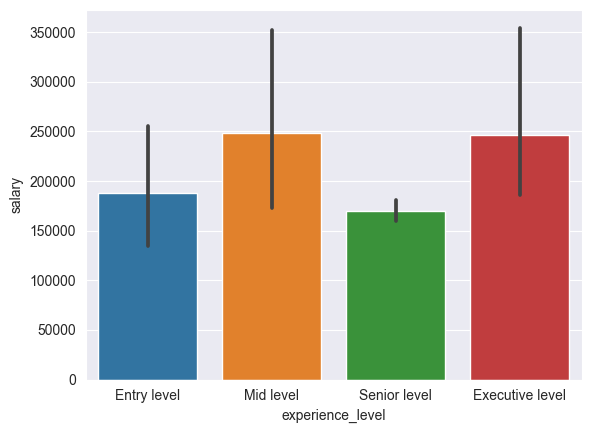

In [11]:
sns.barplot(data = df, x='experience_level', y='salary', order = ['Entry level', 'Mid level', 'Senior level', 'Executive level'])

We can see that for the salaries for each incremental experience level (entry level, mid level, senior level, executive level), it does not follow the expected upwards patter. 
This must be because we are not considering the job titles. 
Let's explore different job groupings.

<Axes: xlabel='job_grouping', ylabel='salary'>

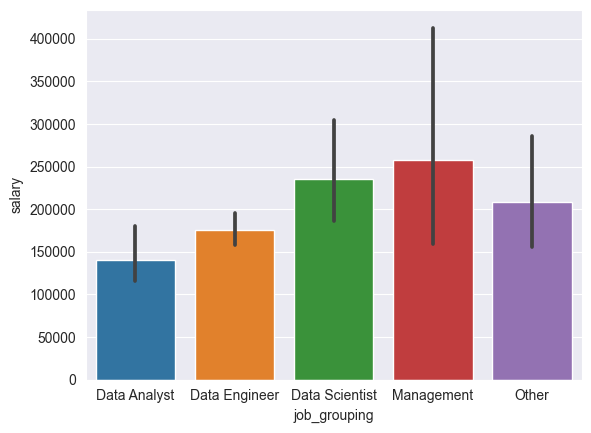

In [12]:
sns.barplot(data = df, x='job_grouping', y='salary')

Here, we can see the types of jobs that are paid the most. Let's take a look at the distribution of the salaries.

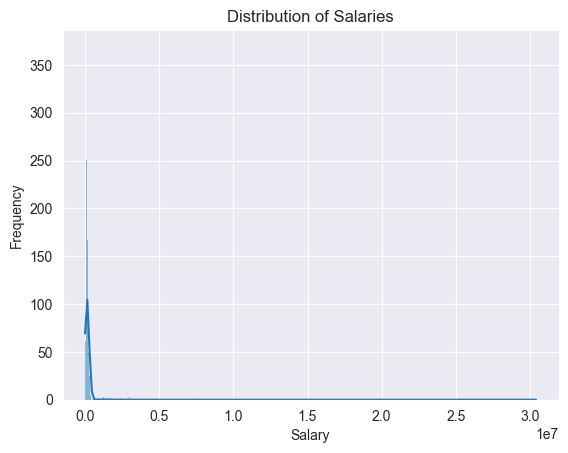

In [18]:
sns.histplot(data=df, x='salary', kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()